# Continuous Probabalistic Methods | `Exercises`

In [28]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## 1a. Identify lower outliers
Use the **IQR Range Rule** and the upper and lower bounds to identify the lower outliers of each column of `lemonade.csv`, using the multiplier of 1.5. 
- Do these lower outliers make sense? 
- Which outliers should be kept?

In [5]:
# importing data from url and reading to pandas df
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

df = pd.read_csv(url)

In [6]:
# previewing df
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


>DataFrame of mixed dtypes

In [8]:
# lower quantile range for numeric columns
df.quantile(.25)

Temperature    49.70
Rainfall        0.65
Flyers         31.00
Price           0.50
Sales          20.00
Name: 0.25, dtype: float64

In [10]:
# upper quantile range for numeric columns
df.quantile(.75)

Temperature    71.70
Rainfall        0.91
Flyers         49.00
Price           0.50
Sales          30.00
Name: 0.75, dtype: float64

In [11]:
# running a for loop that will loop through each column and print all integer and float dtype columns
for col in df:
    if (df[col].dtype =='int') | (df[col].dtype == 'float'):
        print(col)

Temperature
Rainfall
Flyers
Price
Sales


In [12]:
# saving multiplier to var
multiplier = 1.5

In [13]:
# saving the q1 values for each column
q1_temp = df.Temperature.quantile(.25)
q1_rain = df.Rainfall.quantile(.25)
q1_flyer = df.Flyers.quantile(.25)
q1_price = df.Price.quantile(.25)
q1_sales = df.Sales.quantile(.25)

# savings the q3 values for each column
q3_temp = df.Temperature.quantile(.75)
q3_rain = df.Rainfall.quantile(.75)
q3_flyer = df.Flyers.quantile(.75)
q3_price = df.Price.quantile(.75)
q3_sales = df.Sales.quantile(.75)

# calculating and saving the iqr for each column
iqr_temp = q3_temp - q1_temp
iqr_rain = q3_rain - q1_rain
iqr_flyer = q3_flyer - q1_flyer
iqr_price = q3_price - q1_price
iqr_sales = q3_sales - q1_sales

In [14]:
# calculating lower fences
inner_lower_fence_temp = q1_temp - (multiplier * iqr_temp)
inner_lower_fence_rain = q1_rain - (multiplier * iqr_rain)
inner_lower_fence_flyer = q1_flyer - (multiplier * iqr_flyer)
inner_lower_fence_price = q1_price - (multiplier * iqr_price)
inner_lower_fence_sales = q1_sales - (multiplier * iqr_sales)

#### Lower outliers of each column based on IQR rule...

In [31]:
# creating a function that plots a boxplot
def boxplot(series):
    '''
THIS FUNCTION TAKES IN A SERIES OF VALUES AND PLOTS A HORIZONTAL BOXPLOT.
    '''
    
    sns.boxplot(series)
    plt.show();

In [32]:
# Temperature lower outliers
df[df.Temperature < inner_lower_fence_temp]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


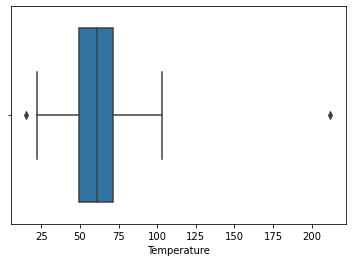

In [33]:
boxplot(df.Temperature)

>#### A 15 degree temperature is pretty cold but, because it is in the month of December and still pretty close to the fence, not sure if it makes sense to discard this as an outlier.

In [19]:
# Rainfall
df[df.Rainfall < inner_lower_fence_rain]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


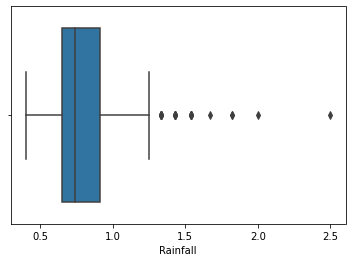

In [34]:
boxplot(df.Rainfall)

>#### No outliers for rainfall based on IQR rule. The data looks to be skewed right so this makes sense.

In [17]:
# Flyers
df[df.Flyers < inner_lower_fence_flyer]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


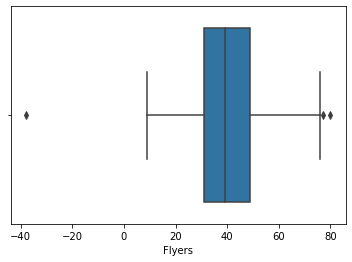

In [35]:
boxplot(df.Flyers)

>#### I do not see how you could have a negative value for `Flyers` so this makse sense as an outlier.

In [20]:
# Price
df[df.Price < inner_lower_fence_price]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


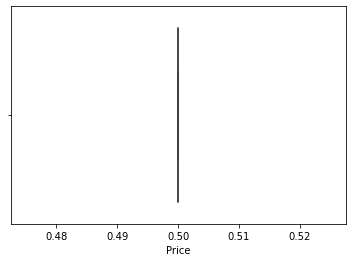

In [36]:
boxplot(df.Price)

In [37]:
# single value for Price, looking at the value counts
df.Price.value_counts()

0.5    365
Name: Price, dtype: int64

>#### Each value in this column is the same so no outliers makes sense here.

In [21]:
# Sales
df [df.Sales < inner_lower_fence_sales]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


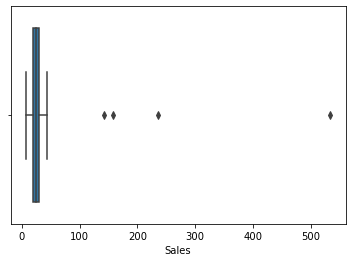

In [38]:
boxplot(df.Sales)

>#### This column is heavily skewed right so it makes sense that there are now lower fence outliers here.

## 1b. Identify upper outliers
Use the **IQR Range Rule** and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. 
- Do these upper outliers make sense? 
- Which outliers should be kept?

In [39]:
# calculating upper fence values
inner_upper_fence_temp = q3_temp + (multiplier * iqr_temp)
inner_upper_fence_rain = q3_rain + (multiplier * iqr_rain)
inner_upper_fence_flyer = q3_flyer + (multiplier * iqr_flyer)
inner_upper_fence_price = q3_price + (multiplier * iqr_price)
inner_upper_fence_sales = q3_sales + (multiplier * iqr_sales)

In [41]:
# Temperature
df[df.Temperature > inner_upper_fence_temp]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


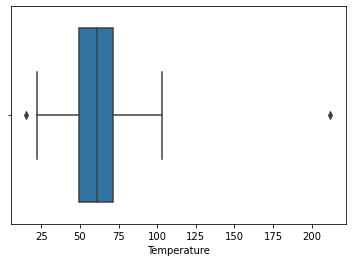

In [42]:
boxplot(df.Temperature)

>#### I am not sure that a temperature of 212 is possible (...on Earth, anyway). I wonder if this is a typo? This definitely makes sense as an outlier.

In [44]:
# Rainfall
df[df.Rainfall > inner_upper_fence_rain].sort_values(by = 'Rainfall', ascending = False)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
15,1/16/17,Monday,30.6,1.67,24,0.5,12
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12
355,12/22/17,Friday,30.9,1.54,17,0.5,13
347,12/14/17,Thursday,31.9,1.54,24,0.5,13
5,1/6/17,Friday,25.3,1.54,23,0.5,11
337,12/4/17,Monday,34.9,1.54,16,0.5,13


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


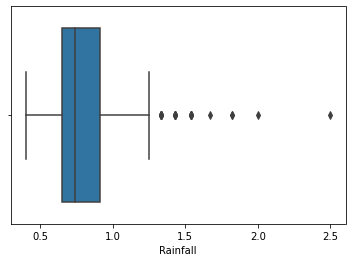

In [45]:
boxplot(df.Rainfall)

>#### I guess this makes sense based on the `IQR`. I guess more than an inch/inch and a half of `Rainfall` is not likely based on the range of this data.

In [46]:
# Flyers
df[df.Flyers > inner_upper_fence_flyer]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


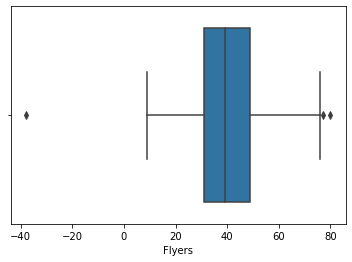

In [47]:
boxplot(df.Flyers)

>#### This makes sense based on the visualization. I do not have anough context about the data to determine whether these amounts are logical.

In [48]:
# Price
df[df.Price > inner_upper_fence_price]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


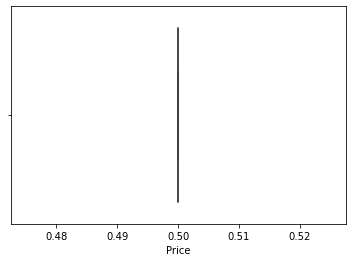

In [49]:
boxplot(df.Price)

>#### There is only x1 unique value for `Price` so it makes sense there are no upper bound outliers.

In [50]:
# Sales
df[df.Sales > inner_upper_fence_sales]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


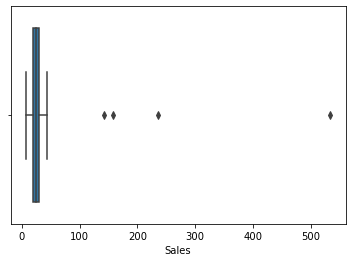

In [51]:
boxplot(df.Sales)

### There was a lot of redundancy in working 1a and 1b. 
Looking ahead at the next parts, I think it would be helpful to have a function to compute these values for different:
- `df`
- `Series`
- `multiplier` values
- `upperbound` and `lowerbound` values

In [69]:
def find_outliers(df, Series, multiplier):
    '''
THIS FUNCTION CALCULATES THE UPPER AND LOWER BOUNDS OF A DF SERIES, PLOTS A BOXPLOT OF
THE SERIES VALUES, AND RETURNS TWO DFs OF THE UPPER AND LOWER VALUES FOR THAT SERIES. 

ARGS:
    - df: the full df
    - Series: df series; Syntax >> df.Series
    - mulitplier: (numeric value) for iqr multiplier, used to calculate upper and lower bounds

RETURNS:
    - lower_outliers: (df) filtered to show rows below lower_bound for series
    - upper_outliers: (df) filtered to show rows above upper_bound for series
    '''

    # calculating q1 and q3 and using them to calculate iqr
    q1 = Series.quantile(.25)
    q3 = Series.quantile(.75)
    print(f'Q1: {q1}\nQ3: {q3}')

    iqr = q3 - q1
    print(f'IQR: {iqr}')
    print()

    # calculating upper and lower bounds
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)
    print(f'Upper Bound: {upper_bound}\nLower Bound: {lower_bound}')
    print()

    # using upper and lower bounds to find outliers
    lower_outliers = df[Series < lower_bound]
    upper_outliers = df[Series > upper_bound]
    
    boxplot(Series)
    plt.show();

    return lower_outliers, upper_outliers
    

Q1: 20.0
Q3: 30.0
IQR: 10.0

Upper Bound: 45.0
Lower Bound: 5.0



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


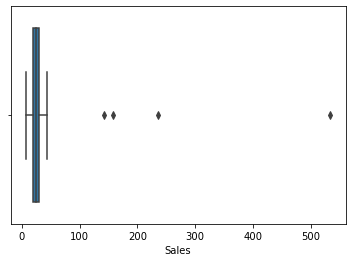

In [70]:
lower_outlier, upper_outliers = find_outliers(df, df.Sales, 1.5)

## 1c. Lower bound outliers
Using the **multiplier of 3, IQR Range Rule**, and **the lower bounds**, identify the outliers below the lower bound in each colum of `lemonade.csv`. 
- Do these lower outliers make sense? 
- Which outliers should be kept?

>Temperature<br>
Rainfall<br>
Flyers<br>
Price<br>
Sales<br>

Q1: 49.7
Q3: 71.7
IQR: 22.0

Upper Bound: 137.7
Lower Bound: -16.299999999999997



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


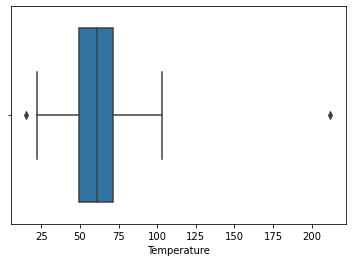

In [71]:
# Temperature

# calling find_outliers function to get Q1, Q3, and lower and upper outliers
lower_outliers_temp, upper_outliers_temp = find_outliers(df, df.Temperature, 3)

In [72]:
lower_outliers_temp

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


>#### The lower bound is negative 16 which is very low so it makes sense that there are no outliers below that lower bound.

Q1: 0.65
Q3: 0.91
IQR: 0.26

Upper Bound: 1.69
Lower Bound: -0.13



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


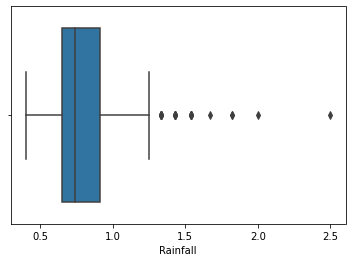

In [74]:
# Rainfall

# calling the find_outliers function
lower_outliers_Rain, upper_outliers_Rain = find_outliers(df, df.Rainfall, 3)

In [75]:
lower_outliers_Rain

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


>#### It makes sense that there would be no negative values for rainfall

Q1: 31.0
Q3: 49.0
IQR: 18.0

Upper Bound: 103.0
Lower Bound: -23.0



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


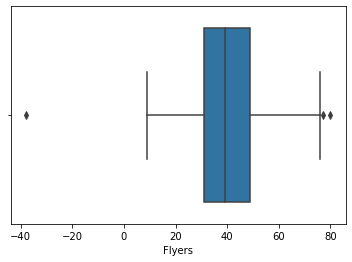

In [76]:
# Flyers

# calling the find_outliers function
lower_outliers_flyers, upper_outliers_flyers = find_outliers(df, df.Flyers, 3)

In [77]:
lower_outliers_flyers

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


>#### I don't think it would make sense to have a negative value for `Flyers`. This value can likely be dropped.

Q1: 0.5
Q3: 0.5
IQR: 0.0

Upper Bound: 0.5
Lower Bound: 0.5



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


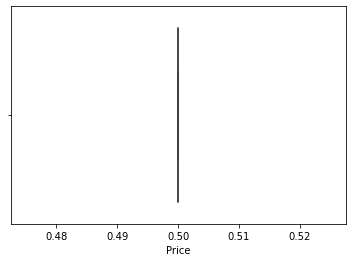

In [78]:
# Price

# calling find_outliers function
lower_outliers_price, upper_outliers_price = find_outliers(df, df.Price, 3)

In [79]:
lower_outliers_price

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


>#### There is only one unique value for `Price` so it makes sense there are no outliers.

Q1: 20.0
Q3: 30.0
IQR: 10.0

Upper Bound: 60.0
Lower Bound: -10.0



/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


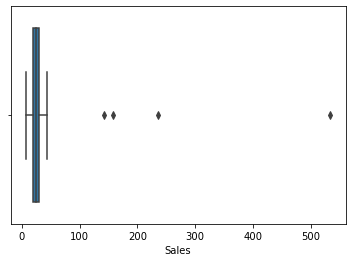

In [80]:
# Sales

# calling find_outliers function
lower_outliers_sales, upper_outliers_sales = find_outliers(df, df.Sales, 3)

In [81]:
lower_outliers_sales

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


>#### The lower bound is negative, lower than the lowest logical value of 0. It makes sense that there are no values below the lower bound.

## 1d. Upper bound outliers
Using the **multiplier of 3, IQR Range Rule**, and **the upper bounds**, identify the outliers above the upper_bound in each colum of `lemonade.csv`. 
- Do these upper outliers make sense? 
- Which outliers should be kept?

In [82]:
# Temperature
upper_outliers_temp

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [83]:
# Rainfall
upper_outliers_Rain

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [84]:
# Flyers
upper_outliers_flyers

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [85]:
# Price
upper_outliers_price

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [86]:
# Sales
upper_outliers_sales

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


## 2. Two Sigma Rule
Identify if any columns in `lemonade.csv` are normally distributed.<br>
For normally distributed columns use the 2 sigma rule to isolate outliers. 
- Do these make sense?
- Should certain outliers be kept or removed?

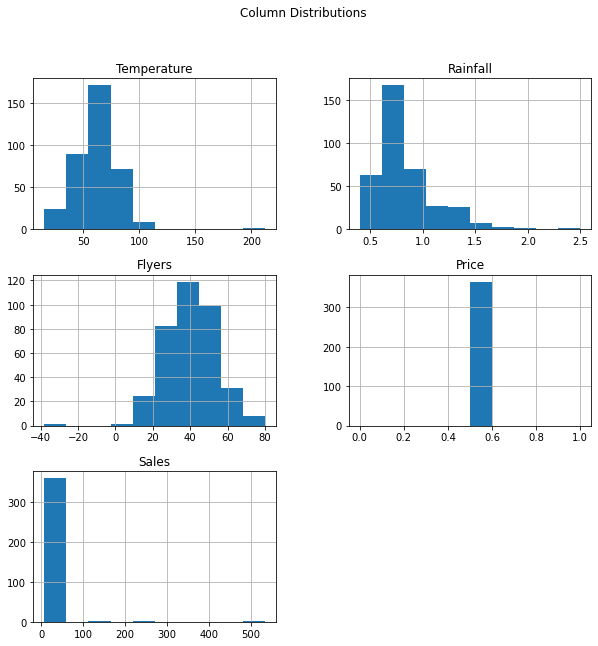

In [98]:
df.hist(figsize = (10, 10))
plt.suptitle('Column Distributions')
plt.show()

##### The `Temperature` column is the closest to being normally distributed, with `Flyers` being somewhat *normal-ish* so I will use these two columns for the Sigma rule questions.

In [99]:
# savings the normal columns in a list
normal_columns = ['Temperature', 'Flyers']

In [103]:
# finds the zscores for each value in the series
df['z_Temp'] = (df.Temperature - df.Temperature.mean()) / df.Temperature.std()
df['z_Flyer'] = (df.Flyers - df.Flyers.mean()) / df.Flyers.std()

In [104]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_Temp,z_Flyer
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,-1.820927
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,-1.820927
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,-0.950507
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,-0.877972
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,-0.515297


In [107]:
# adding columns for temperatures outside of 2 and 3 std deviations
df['Temp > 2'] = df.z_Temp.abs() > 2
df['Temp > 3'] = df.z_Temp.abs() > 3
df['Flyer > 2'] = df.z_Temp.abs() > 2
df['Flyer > 3'] = df.z_Temp.abs() > 3

df.head()


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_Temp,z_Flyer,Temp > 2,Temp > 3,Flyer > 2,Flyer > 3
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,-1.820927,False,False,False,False
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,-1.820927,False,False,False,False
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,-0.950507,False,False,False,False
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,-0.877972,False,False,False,False
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,-0.515297,False,False,False,False


In [110]:
df.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales',
       'z_Temp', 'z_Flyer', 'Temp > 2', 'Temp > 3', 'Flyer > 2', 'Flyer > 3'],
      dtype='object')

### Temperature 2 and 3 Sigma Rule

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


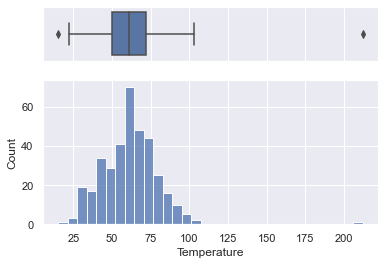

In [160]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style = "darkgrid")

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios" : (.75, 2)})
 
# assigning a graph to each ax
sns.boxplot(df["Temperature"], ax = ax_box)
sns.histplot(data=df, x="Temperature", ax = ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel = '')
plt.show();

In [117]:
print('Observations outside of x2 standard deviations of Temperature')
df[df['Temp > 2'] == True]

Observations outside of x2 standard deviations of Temperature


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_Temp,z_Flyer,Temp > 2,Temp > 3,Flyer > 2,Flyer > 3
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,-0.370227,True,True,True,True
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,2.676244,True,False,True,False
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.287714,1.443149,True,False,True,False
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,1.370614,True,False,True,False
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.033372,1.878359,True,False,True,False
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,2.603709,True,False,True,False
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.121838,0.645264,True,False,True,False
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,2.458639,True,False,True,False
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,-2.111067,True,False,True,False
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,-2.256137,True,False,True,False


In [118]:
print('Observations outside of x3 standard deviations of Temperature')
df[df['Temp > 3'] == True]

Observations outside of x3 standard deviations of Temperature


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_Temp,z_Flyer,Temp > 2,Temp > 3,Flyer > 2,Flyer > 3
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,-0.370227,True,True,True,True


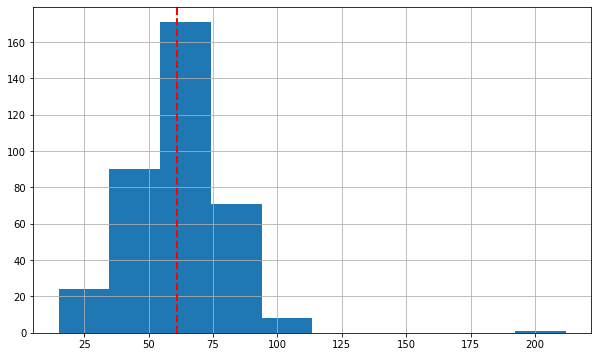

In [140]:
df.Temperature.hist(figsize = (10, 6))
plt.axvline(df.Temperature.median(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.show()

Code Reference: [python-graph-gallery](https://www.python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn)

### Flyers 2 and 3 Sigma Rule

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


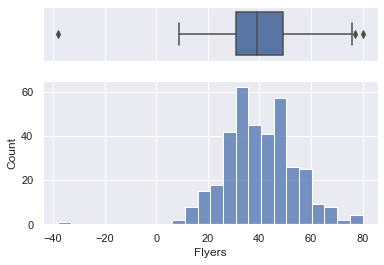

In [164]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios" : (.75, 2)})
 
# assigning a graph to each ax
sns.boxplot(df["Flyers"], ax = ax_box)
sns.histplot(data=df, x="Flyers", ax = ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel = '')
plt.show();

In [120]:
print('Observations outside of x2 standard deviations of Flyer')
df[df['Flyer > 2'] == True]

Observations outside of x2 standard deviations of Flyer


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_Temp,z_Flyer,Temp > 2,Temp > 3,Flyer > 2,Flyer > 3
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,-0.370227,True,True,True,True
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,2.676244,True,False,True,False
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.287714,1.443149,True,False,True,False
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,1.370614,True,False,True,False
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.033372,1.878359,True,False,True,False
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,2.603709,True,False,True,False
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.121838,0.645264,True,False,True,False
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,2.458639,True,False,True,False
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,-2.111067,True,False,True,False
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,-2.256137,True,False,True,False


In [119]:
print('Observations outside of x3 standard deviations of Flyer')
df[df['Flyer > 3'] == True]

Observations outside of x3 standard deviations of Flyer


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,z_Temp,z_Flyer,Temp > 2,Temp > 3,Flyer > 2,Flyer > 3
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,-0.370227,True,True,True,True


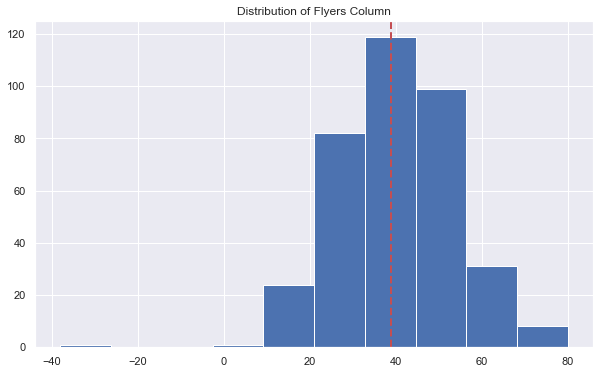

In [163]:
df.Flyers.hist(figsize = (10, 6))
plt.axvline(df.Flyers.median(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.title('Distribution of Flyers Column')
plt.show()
